In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
# Load dataset
df = pd.read_csv("tested.csv")

# Select numerical attributes
numerical_cols = ["Age", "Fare", "Pclass"]

# Drop rows with missing values in numerical columns
df = df[numerical_cols].dropna()

In [14]:
df.head()

,Age,Fare,Pclass
0,34.5,7.8292,3
1,47.0,7.0000,3
2,62.0,9.6875,2
3,27.0,8.6625,3
4,22.0,12.2875,3


In [3]:
# 1. Compute Standard Deviation & Variance using built in function
std_dev = df.std()
variance = df.var()

print("Standard Deviation:\n", std_dev)
print("\nVariance:\n", variance)

Standard Deviation:
 PassengerId    120.810458
Survived         0.481622
Pclass           0.841838
Age             14.181209
SibSp            0.896760
Parch            0.981429
Fare            55.907576
dtype: float64

Variance:
 PassengerId    14595.166667
Survived           0.231960
Pclass             0.708690
Age              201.106695
SibSp              0.804178
Parch              0.963203
Fare            3125.657074
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_1848\1456691243.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df.std()
C:\Users\hp\AppData\Local\Temp\ipykernel_1848\1456691243.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()


In [4]:
#without using built in function
variance_manual = {}
std_dev_manual = {}

for col in numerical_cols:
    values = df[col].values
    mean_value = sum(values) / len(values)  
    squared_diffs = [(x - mean_value) ** 2 for x in values]  
    variance_manual[col] = sum(squared_diffs) / len(values)  
    std_dev_manual[col] = variance_manual[col] ** 0.5  

print("Variance:", variance_manual)
print("Standard Deviation:", std_dev_manual)

Variance: {'Age': nan, 'Fare': nan, 'Pclass': 0.706995032165017}
Standard Deviation: {'Age': nan, 'Fare': nan, 'Pclass': 0.8408299662625119}



Covariance Matrix:
               PassengerId  Survived     Pclass         Age     SibSp  \
PassengerId  14595.166667 -1.352518  -2.720624  -59.369047  0.413669   
Survived        -1.352518  0.231960  -0.044037   -0.000088  0.043165   
Pclass          -2.720624 -0.044037   0.708690   -5.906358  0.000820   
Age            -59.369047 -0.000088  -5.906358  201.106695 -1.135270   
SibSp            0.413669  0.043165   0.000820   -1.135270  0.804178   
Parch            5.107914  0.075213   0.015467   -0.704115  0.270100   
Fare            55.514238  5.159417 -27.171232  291.838610  8.607981   

                 Parch         Fare  
PassengerId   5.107914    55.514238  
Survived      0.075213     5.159417  
Pclass        0.015467   -27.171232  
Age          -0.704115   291.838610  
SibSp         0.270100     8.607981  
Parch         0.963203    12.635175  
Fare         12.635175  3125.657074  

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  

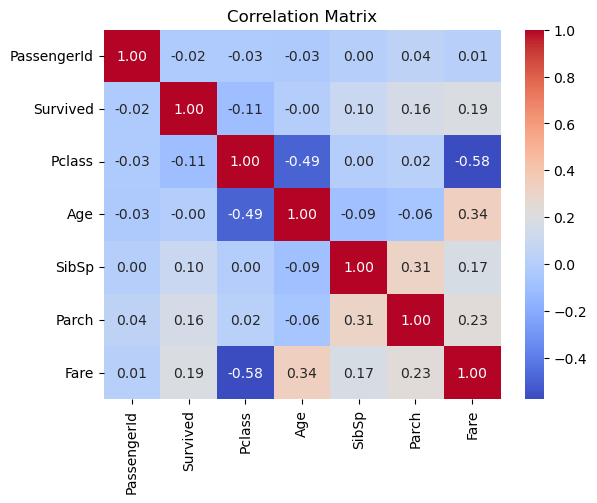

In [5]:
# 2. Compute Covariance & Correlation Matrix
cov_matrix = df.cov()
correlation_matrix = df.corr()

print("\nCovariance Matrix:\n", cov_matrix)
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualizing correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Compute Covariance & Correlation Manually
def manual_covariance(x, y):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    covariance = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / len(x)
    return covariance

def manual_correlation(x, y):
    std_x = (sum((i - sum(x) / len(x)) ** 2 for i in x) / len(x)) ** 0.5
    std_y = (sum((i - sum(y) / len(y)) ** 2 for i in y) / len(y)) ** 0.5
    return manual_covariance(x, y) / (std_x * std_y)

cov_matrix_manual = {}
corr_matrix_manual = {}

for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            cov_matrix_manual[f"{col1}-{col2}"] = manual_covariance(df[col1].values, df[col2].values)
            corr_matrix_manual[f"{col1}-{col2}"] = manual_correlation(df[col1].values, df[col2].values)

print("Covariance:", cov_matrix_manual)
print("Correlation:", corr_matrix_manual)


Covariance: {'Age-Fare': 290.9569223907228, 'Age-Pclass': -5.984711895656299, 'Fare-Age': 290.9569223907228, 'Fare-Pclass': -30.257527503399924, 'Pclass-Age': -5.984711895656299, 'Pclass-Fare': -30.257527503399924}
Correlation: {'Age-Fare': 0.3379315845519921, 'Age-Pclass': -0.5029193303548648, 'Fare-Age': 0.3379315845519921, 'Fare-Pclass': -0.5857258812324443, 'Pclass-Age': -0.5029193303548648, 'Pclass-Fare': -0.5857258812324443}


In [6]:
# 3. Identifying Independent Features using correlation threshold
threshold = 0.8  # If correlation > 0.8, they are highly correlated
independent_features = []
for col in correlation_matrix.columns:
    if all(abs(correlation_matrix[col]) < threshold):
        independent_features.append(col)

print("\nIndependent Features:\n", independent_features)


Independent Features:
 []


In [7]:
# 4. Identifying Unwanted Features (Based on low correlation with target or high missing values)
unwanted_features = []
missing_values = df.isnull().sum()
low_variance = variance[variance < 0.5].index.tolist()
unwanted_features.extend(low_variance)

print("\nPotential Unwanted Features:\n", unwanted_features)


Potential Unwanted Features:
 ['Survived']


In [8]:
# 5. Data Discretization (Equi-Frequency Binning on Age)
df["Age_Bins"] = pd.qcut(df["Age"], q=4, labels=["Young", "Middle-Aged", "Senior", "Elderly"])
print("\nAge Binning (Equi-Frequency):\n", df["Age_Bins"].value_counts())


Age Binning (Equi-Frequency):
 Young          86
Senior         83
Elderly        82
Middle-Aged    81
Name: Age_Bins, dtype: int64


In [22]:
# Sort the Age values(Equi-Frequency Binning on Age)
sorted_ages = sorted(df["Age"].dropna().values)

# Divide into 4 bins
bin_size = len(sorted_ages) // 4
bins = {
    "Young": sorted_ages[:bin_size],
    "Middle-Aged": sorted_ages[bin_size:2*bin_size],
    "Senior": sorted_ages[2*bin_size:3*bin_size],
    "Elderly": sorted_ages[3*bin_size:]
}

# Assign bins manually
def assign_bin(age):
    for category, values in bins.items():
        if age in values:
            return category
    return "Elderly"  # Assign the last bin by default

df["Age_Bins"] = df["Age"].apply(assign_bin)
print("Age Bins:\n", df["Age_Bins"].value_counts())


Age Bins:
 Young          86
Senior         83
Elderly        81
Middle-Aged    81
Name: Age_Bins, dtype: int64


In [19]:
# 6. Data Normalization

# Min-Max Normalization
scaler = MinMaxScaler()
df["Fare_MinMax"] = scaler.fit_transform(df[["Fare"]])

In [18]:
# Min-Max Normalization Manual Calculation
min_max_scaled = {}

for col in ["Fare", "Age", "Pclass"]:
    values = df[col].dropna().values  # Remove NaN values
    min_val = sorted(values)[0]  # Manually find min
    max_val = sorted(values)[-1]  # Manually find max

    # Apply Min-Max Normalization formula
    min_max_scaled[col] = [(x - min_val) / (max_val - min_val) for x in values]

# Display first 5 results
for col in ["Fare", "Age", "Pclass"]:
    print(f"\n{col} Min-Max Normalization:")
    print("Original:", df[col].values[:5])
    print("Normalized:", min_max_scaled[col][:5])



Fare Min-Max Normalization:
Original: [ 7.8292  7.      9.6875  8.6625 12.2875]
Normalized: [0.015281580671177828, 0.013663090060062943, 0.018908740708122825, 0.016908073949327893, 0.023983602730431916]

Age Min-Max Normalization:
Original: [34.5 47.  62.  27.  22. ]
Normalized: [0.45272319662402744, 0.6175656072794409, 0.815376500065937, 0.3538177502307794, 0.287880785968614]

Pclass Min-Max Normalization:
Original: [3 3 2 3 3]
Normalized: [1.0, 1.0, 0.5, 1.0, 1.0]


In [10]:
# Z-score Normalization
scaler = StandardScaler()
df["Fare_Zscore"] = scaler.fit_transform(df[["Fare"]])

In [20]:
# Z-Score Normalization Manual Calculation
z_score_scaled = {}

for col in ["Fare", "Age", "Pclass"]:
    values = df[col].dropna().values  # Remove NaN values
    
    # Compute mean manually
    mean_val = sum(values) / len(values)

    # Compute standard deviation manually
    squared_diffs = [(x - mean_val) ** 2 for x in values]
    std_val = (sum(squared_diffs) / len(values)) ** 0.5

    # Apply Z-Score Normalization formula
    z_score_scaled[col] = [(x - mean_val) / std_val for x in values]

# Display first 5 results
for col in ["Fare", "Age", "Pclass"]:
    print(f"\n{col} Z-Score Normalization:")
    print("Original:", df[col].values[:5])
    print("Normalized:", z_score_scaled[col][:5])



Fare Z-Score Normalization:
Original: [ 7.8292  7.      9.6875  8.6625 12.2875]
Normalized: [-0.5422809539231517, -0.5558441577181183, -0.5118847870005917, -0.528650686530067, -0.4693566516087519]

Age Z-Score Normalization:
Original: [34.5 47.  62.  27.  22. ]
Normalized: [0.3066572681324024, 1.194236454489741, 2.259331478118547, -0.2258902436820007, -0.5809219182249361]

Pclass Z-Score Normalization:
Original: [3 3 2 3 3]
Normalized: [1.015426118678951, 1.015426118678951, -0.16804587175320673, 1.015426118678951, 1.015426118678951]


In [11]:
# Decimal Scaling Normalization
df["Fare_DecimalScaling"] = df["Fare"] / (10**np.ceil(np.log10(df["Fare"].abs().max())))

print("\nNormalized Data (Min-Max, Z-score, Decimal Scaling):\n", df[["Fare", "Fare_MinMax", "Fare_Zscore", "Fare_DecimalScaling"]].head())


Normalized Data (Min-Max, Z-score, Decimal Scaling):
       Fare  Fare_MinMax  Fare_Zscore  Fare_DecimalScaling
0   7.8292     0.015282    -0.497811             0.007829
1   7.0000     0.013663    -0.512660             0.007000
2   9.6875     0.018909    -0.464532             0.009687
3   8.6625     0.016908    -0.482888             0.008663
4  12.2875     0.023984    -0.417971             0.012287


In [21]:
# Decimal Scaling Normalization Manual Calculation
decimal_scaled = {}

for col in ["Fare", "Age", "Pclass"]:
    values = df[col].dropna().values  # Remove NaN values
    
    # Find max absolute value manually
    max_abs_val = max(abs(x) for x in values)
    
    # Find j (number of digits in max_abs_val)
    j = len(str(int(max_abs_val)))

    # Apply Decimal Scaling formula
    decimal_scaled[col] = [x / (10 ** j) for x in values]

# Display first 5 results
for col in ["Fare", "Age", "Pclass"]:
    print(f"\n{col} Decimal Scaling Normalization:")
    print("Original:", df[col].values[:5])
    print("Normalized:", decimal_scaled[col][:5])



Fare Decimal Scaling Normalization:
Original: [ 7.8292  7.      9.6875  8.6625 12.2875]
Normalized: [0.0078292, 0.007, 0.0096875, 0.0086625, 0.0122875]

Age Decimal Scaling Normalization:
Original: [34.5 47.  62.  27.  22. ]
Normalized: [0.345, 0.47, 0.62, 0.27, 0.22]

Pclass Decimal Scaling Normalization:
Original: [3 3 2 3 3]
Normalized: [0.3, 0.3, 0.2, 0.3, 0.3]


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bins,Fare_MinMax,Fare_Zscore,Fare_DecimalScaling
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Senior,0.015282,-0.497811,0.007829
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Elderly,0.013663,-0.512660,0.007000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Elderly,0.018909,-0.464532,0.009687
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Middle-Aged,0.016908,-0.482888,0.008663
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Middle-Aged,0.023984,-0.417971,0.012287
